In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [5]:
data=pd.read_csv('/VSCodeLanguages/Applied Data Science/.ipynb_checkpoints/Uber Drives - .csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [7]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [14]:
data=data.dropna()
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [12]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [18]:
data['START_DATE*']=pd.to_datetime(data['START_DATE*'],format='%m/%d/%Y %H:%M')
data['END_DATE*']=pd.to_datetime(data['END_DATE*'],format='%m/%d/%Y %H:%M')
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [27]:
hour = []
day = []
dayofweek = []
month = []
weekday = []
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
data['HOUR']= hour
data['DAY'] = day
data['DAY OF WEEK'] = dayofweek
data['MONTH'] =month
data['WEEKDAY'] = weekday 
data.head()

# The 'START_DATE*' column presumably contains datetime objects. In Python's datetime module, each datetime object
# has a dayofweek attribute, which represents the day of the week as an integer, where Monday is 0 and Sunday is 6.

# When the code iterates through each element (x) in the 'START_DATE*' column using the loop for x in data['START_DATE*']:,
# it is assumed that x is a datetime object.

# x.dayofweek is then used to get the day of the week as an integer (0 to 6). This integer value is what is being used to index 
# into calendar.day_name to get the corresponding full name of the day of the week.


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


Text(0, 0.5, 'Number of rides')

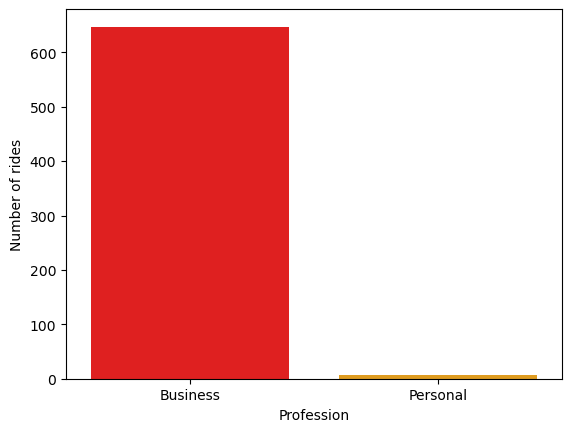

In [41]:
custom_colors = ['red', 'orange', 'green', 'orange', 'purple']
sns.countplot(x='CATEGORY*', data=data, palette=custom_colors,)
plt.xlabel('Profession')
plt.ylabel('Number of rides')

(0.0, 60.0)

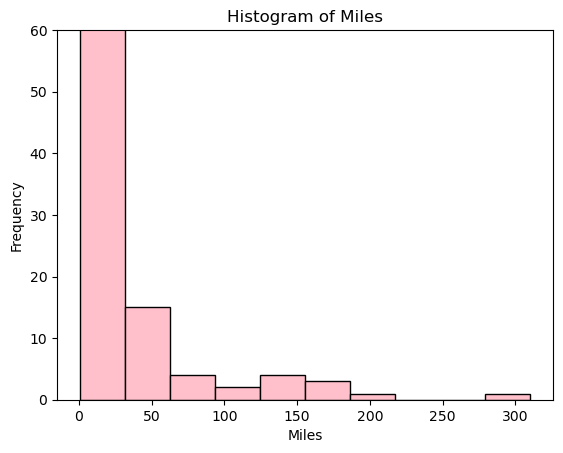

In [54]:
data['MILES*'].plot.hist(color='pink', edgecolor='black')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.title('Histogram of Miles')
plt.ylim(0,60)

Text(0.5, 1.0, 'Number of Trips')

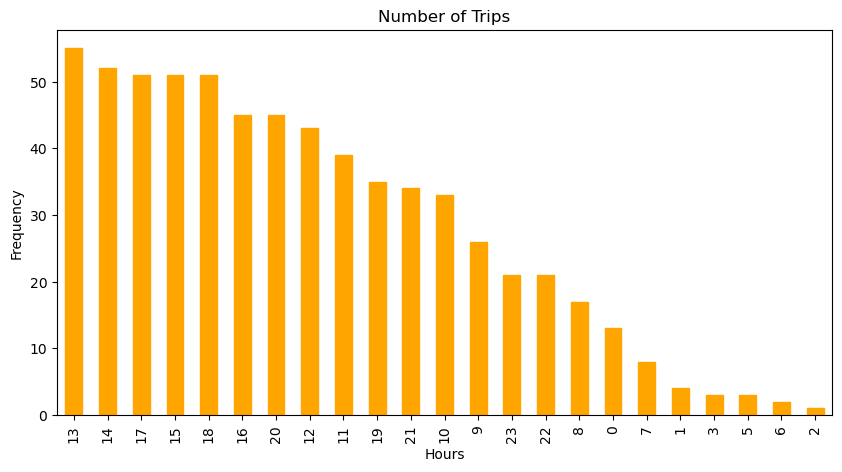

In [60]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar', color='orange', figsize=(10,5), edgecolor='orange')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips')

<Axes: xlabel='PURPOSE*'>

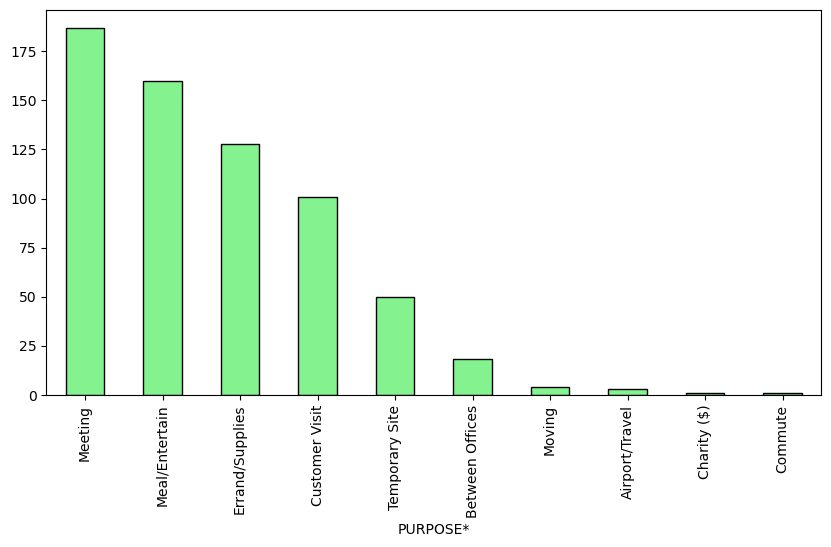

In [63]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='#83f28f',edgecolor='black')

<Axes: xlabel='WEEKDAY'>

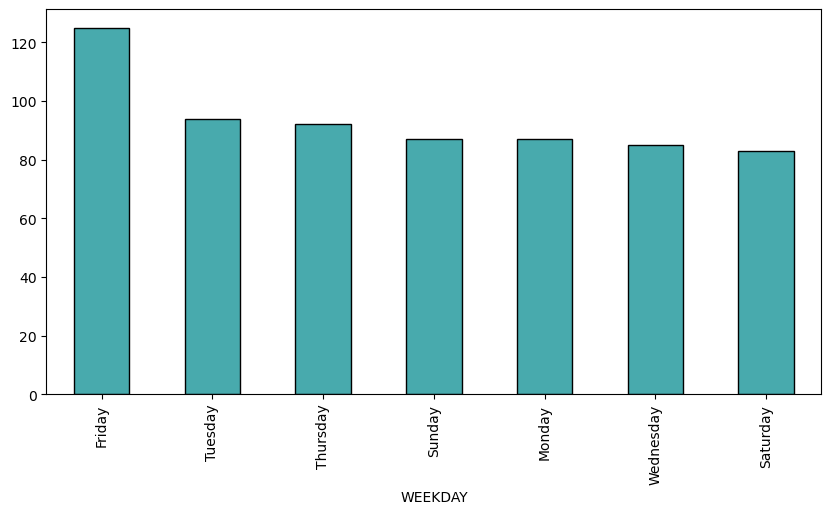

In [65]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='#48AAAD',edgecolor='black')

<Axes: xlabel='DAY'>

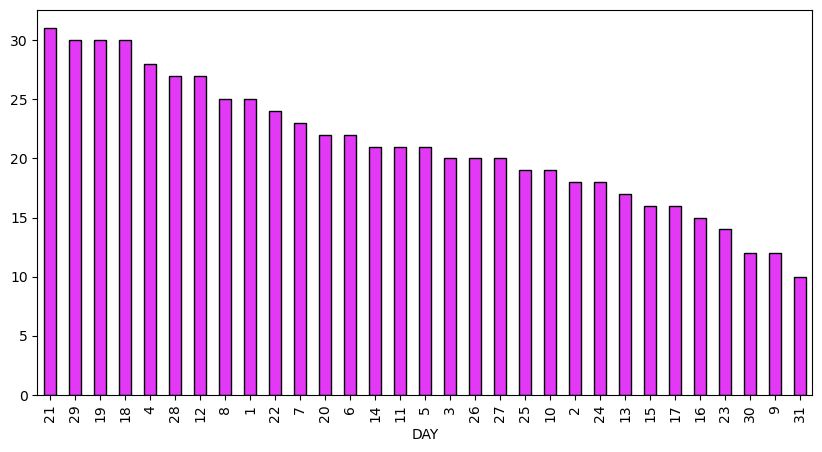

In [67]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='#E339F6',edgecolor='black')

<Axes: xlabel='MONTH'>

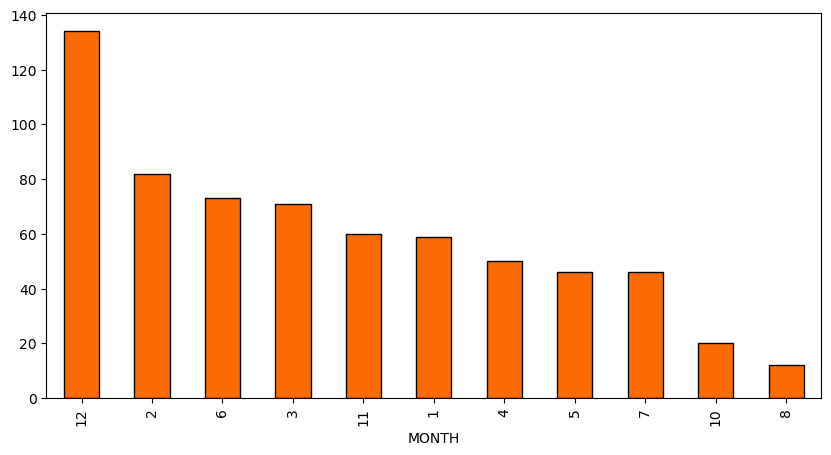

In [68]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='#FC6A03',edgecolor='black')

<Axes: xlabel='START*'>

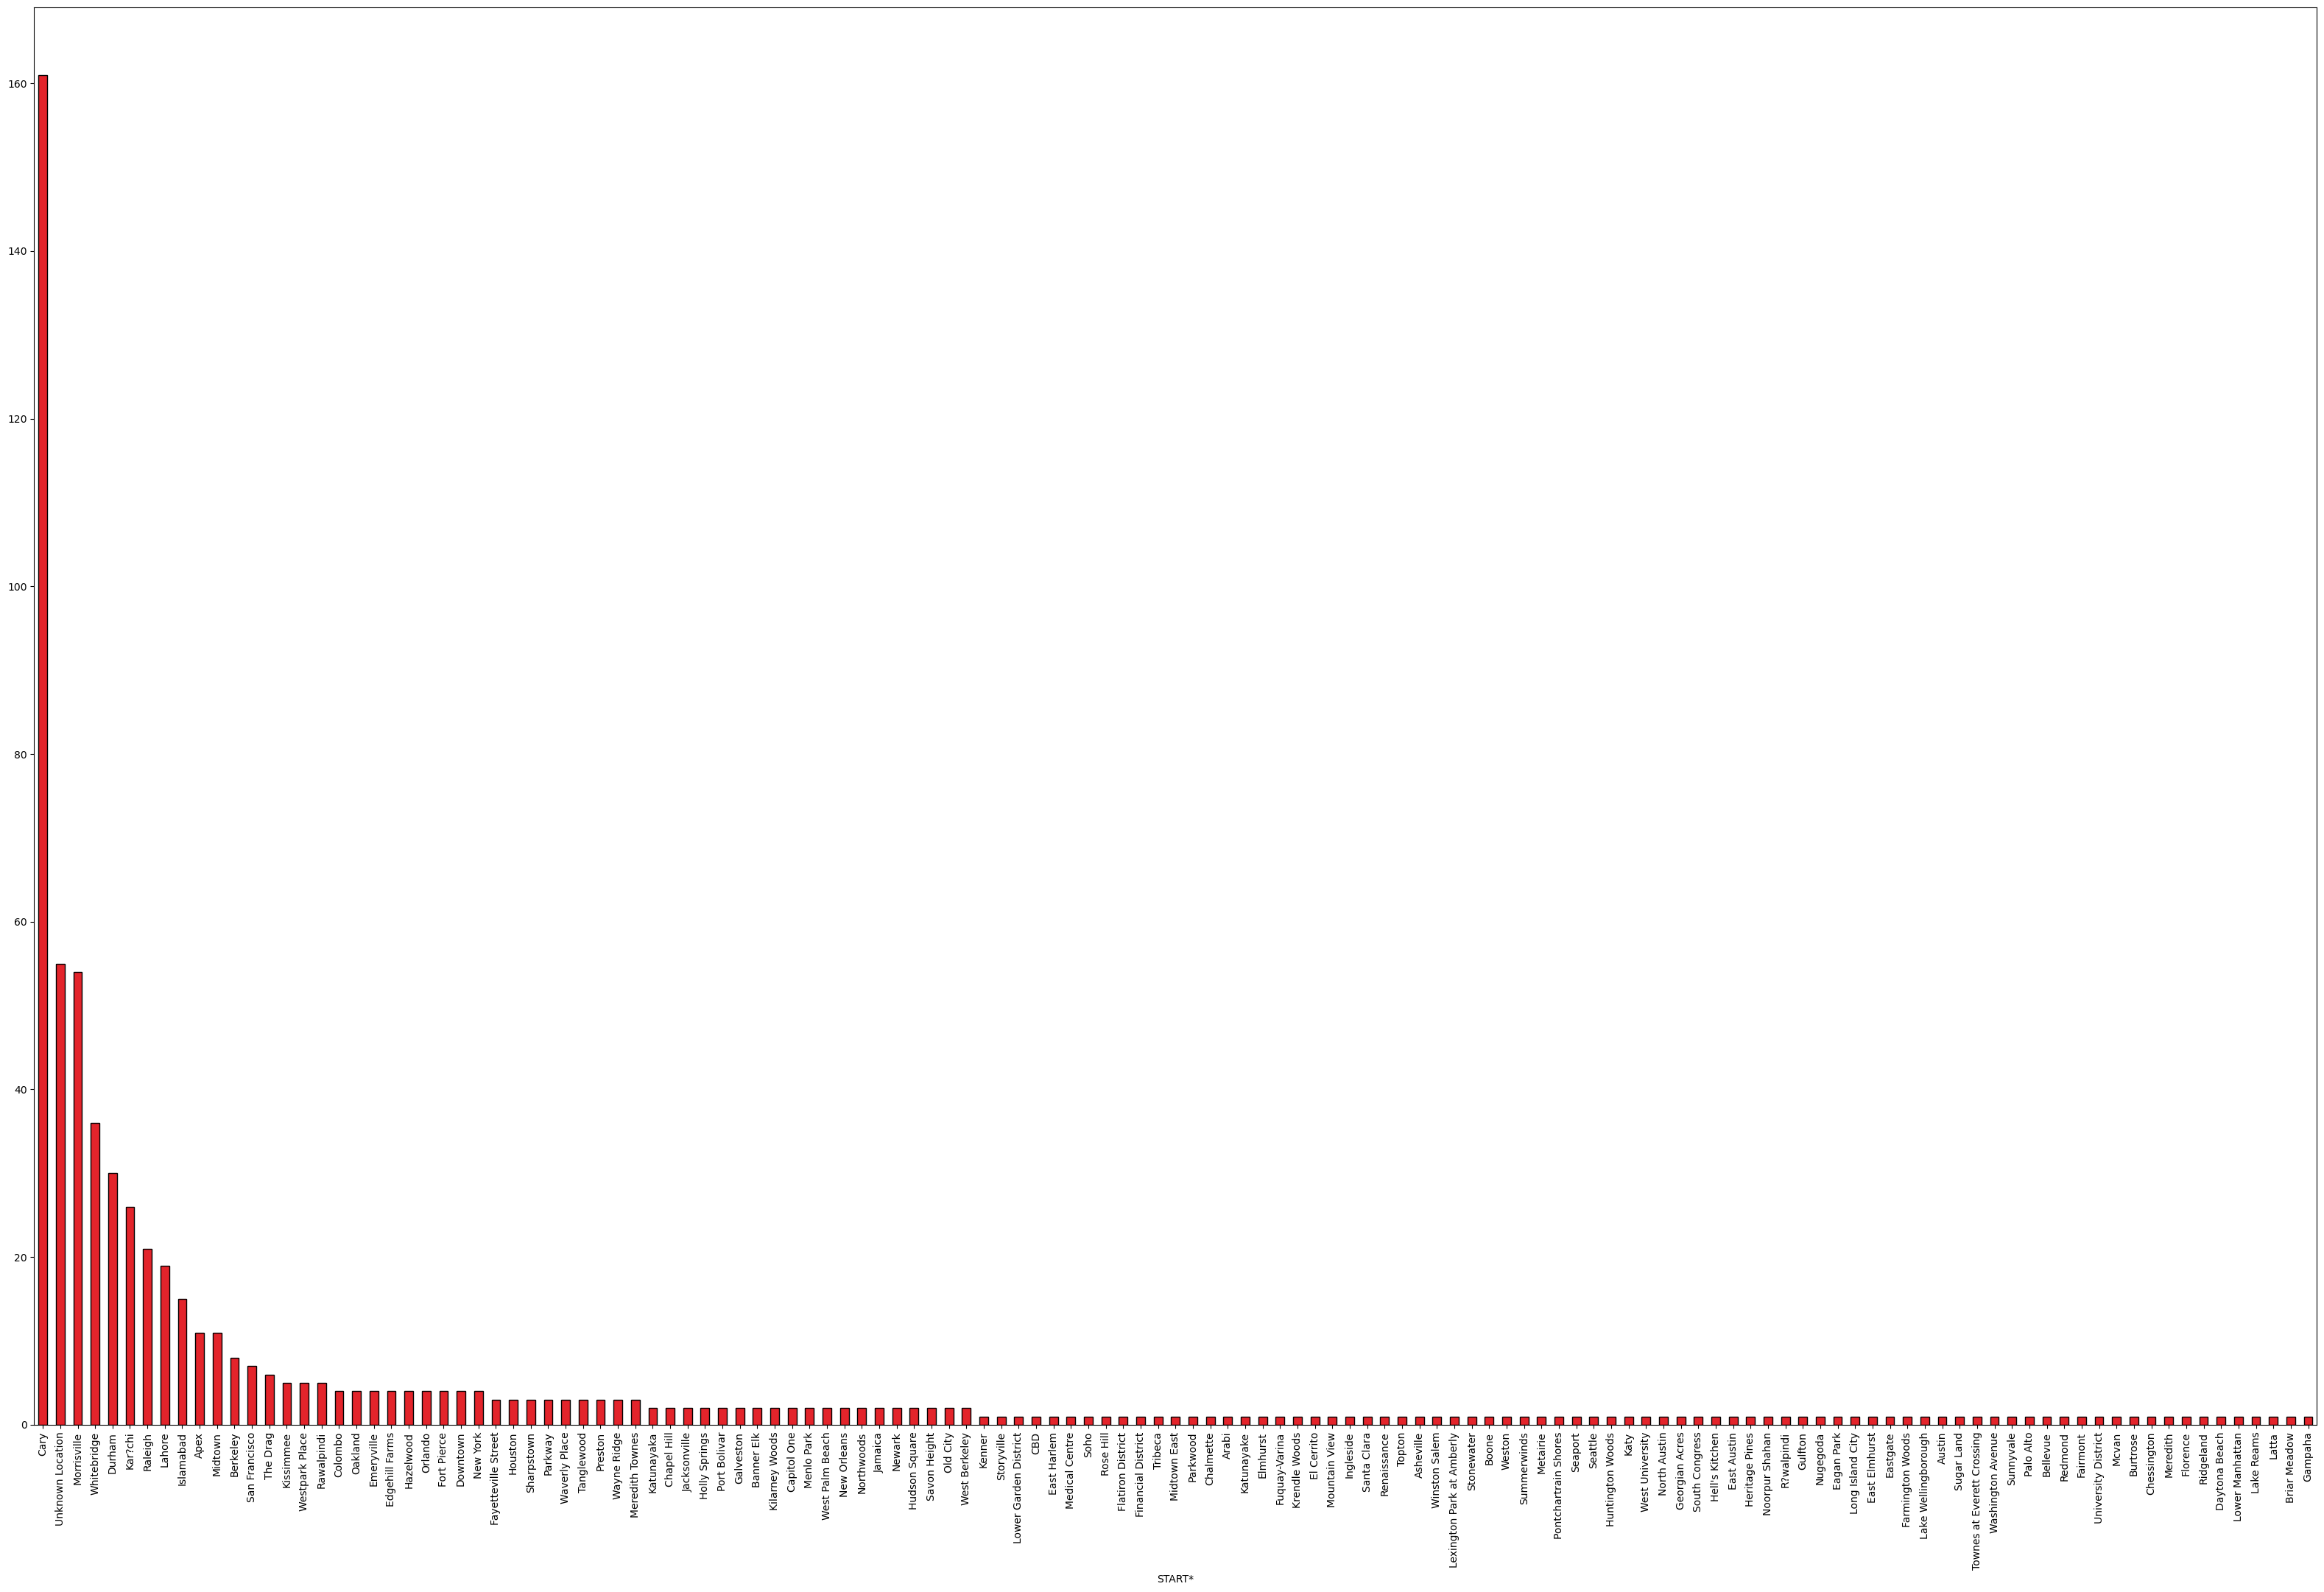

In [72]:
data['START*'].value_counts().plot(kind='bar',figsize=(40,25),color='#E3242B',edgecolor='black')